In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-data.csv')
iris.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [3]:
# What are the dtypes
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [4]:
# looking for NaN values in the dataset for the dataframe
iris.isnull().values.any()

True

In [5]:
# Looking for the NaN values in the dataframe for every column
iris.isnull().any()

sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm      True
class              False
dtype: bool

In [6]:
# Looking for number of rows in every column having NaN values
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
# """Finding out for NAN values for that particular column and getting the index of it"""
nan_rows = iris.loc[iris['petal_width_cm'].isnull()].index
nan_rows

Int64Index([7, 8, 9, 10, 11], dtype='int64')

In [8]:
"""There are only 5 rows out of 150 having NaN values, I don't want to remove them, instead I fill them with 0, so
that it won't effect remaining columns."""

"There are only 5 rows out of 150 having NaN values, I don't want to remove them, instead I fill them with 0, so\nthat it won't effect remaining columns."

In [9]:
# I filled the NaN values with 0 rather than deleting the rows.
iris = iris.fillna(0)

In [10]:
# confirming still there are any null values in the dataset.
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [11]:
# looking into only one categorical variable in the dataset, finding the unique values in it
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [12]:
# How many rows consists of each value in the class column
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [13]:
"""As from the above cell we can see there are two fields Iris-setossa,versicolor are different. So, now we have to
relabel them with the correct names."""

'As from the above cell we can see there are two fields Iris-setossa,versicolor are different. So, now we have to\nrelabel them with the correct names.'

In [14]:
# Relabelling the class names
iris['class'].replace({'versicolor': 'Iris-versicolor', 'Iris-setossa' : 'Iris-setosa'}, inplace = True)

In [15]:
# Printing the unique fields from the class
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Counting the number of rows of each class name
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b22a0a9d0>,
      dtype=object)

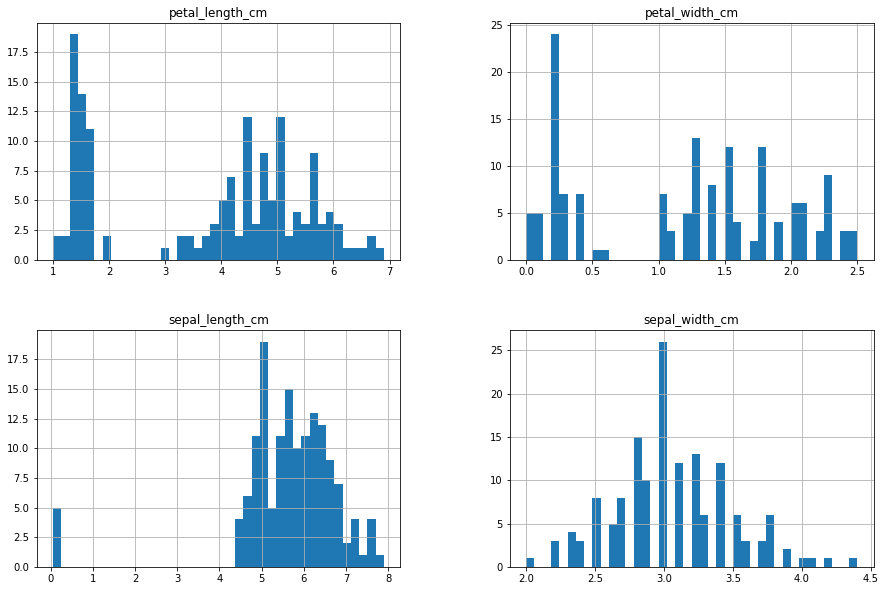

In [17]:
iris.hist(bins=40, figsize=(15,10))

In [18]:
"""From the histogram I found out that there are some missing values in petal_length_cm, petal_width_cm and sepal_length_cm
So, I'm look deep into individual columns to find out that."""


"From the histogram I found out that there are some missing values in petal_length_cm, petal_width_cm and sepal_length_cm\nSo, I'm look deep into individual columns to find out that."

In [19]:
# Looking into the values of sepal_length_cm
iris_sepal_length_list = list(iris['sepal_length_cm'])
# iris_sepal_length_list

In [20]:
# Defined a function to convert cm to meters as there are some values which are in meters but not in cms
def convert_cm_to_m(x):
    if x < 0.1:
        x = x * 100
        return x
    else:
        return x


In [21]:
# Converted the values and reassigning them to the main column
iris['sepal_length_cm'] = list(map(convert_cm_to_m,iris_sepal_length_list ))

In [22]:
iris['sepal_length_cm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 5.7, 5.8, 5.2, 5.5, 4.5,
       5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7, 6.2,
       6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b22be1fd0>,
      dtype=object)

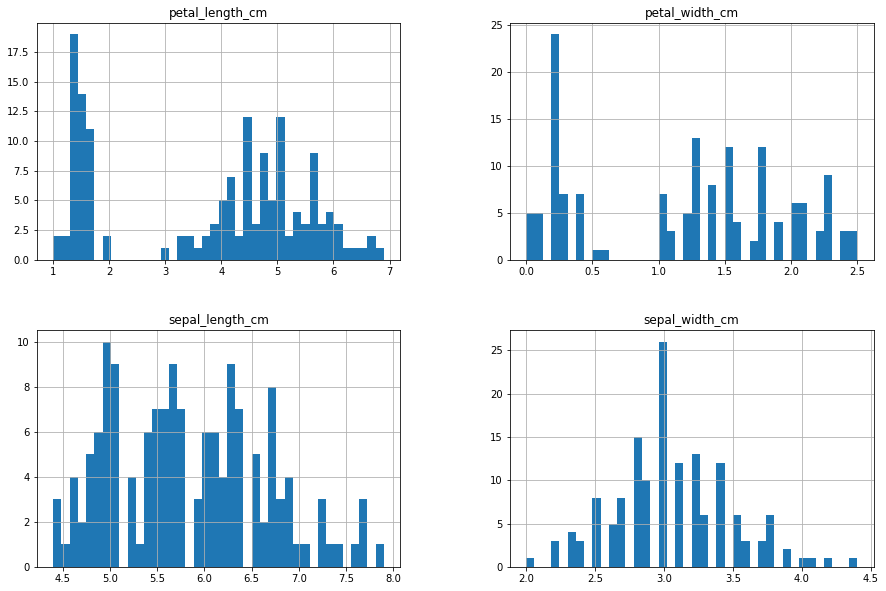

In [23]:
iris.hist(bins=40, figsize=(15,10))

In [ ]:
"""From the histogram, I don't see any missing value in sepal_length_cm"""

In [24]:
# Looking for any wrong measuring units in petal_length_cm
iris_petal_length_list = list(iris['petal_length_cm'].unique())
iris_petal_length_list

[1.4,
 1.3,
 1.5,
 1.7,
 1.6,
 1.1,
 1.2,
 1.0,
 1.9,
 4.7,
 4.5,
 4.9,
 4.0,
 4.6,
 3.3,
 3.9,
 3.5,
 4.2,
 3.6,
 4.4,
 4.1,
 4.8,
 4.3,
 5.0,
 3.8,
 3.7,
 5.1,
 3.0,
 6.0,
 5.9,
 5.6,
 5.8,
 6.6,
 6.3,
 6.1,
 5.3,
 5.5,
 6.7,
 6.9,
 5.7,
 6.4,
 5.4,
 5.2]

In [25]:
# Looking for any wrong measuring units in petal_width_cm
iris_petal_width_list = list(iris['petal_width_cm'].unique())
iris_petal_width_list

[0.2,
 0.4,
 0.3,
 0.0,
 0.1,
 0.5,
 0.6,
 1.4,
 1.5,
 1.3,
 1.6,
 1.0,
 1.1,
 1.8,
 1.2,
 1.7,
 2.5,
 1.9,
 2.1,
 2.2,
 2.0,
 2.4,
 2.3]

In [26]:
# Looking for any wrong measuring units in sepal_width_cm
iris_sepal_width_list = list(iris['sepal_width_cm'].unique())
iris_sepal_width_list

[3.5,
 3.0,
 3.2,
 3.1,
 3.6,
 3.9,
 3.4,
 2.9,
 3.7,
 4.0,
 4.4,
 3.8,
 3.3,
 4.1,
 4.2,
 2.3,
 2.8,
 2.4,
 2.7,
 2.0,
 2.2,
 2.5,
 2.6]

In [27]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
iris.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.103578,0.850576,0.805574
sepal_width_cm,-0.103578,1.000000,-0.419796,-0.359940
petal_length_cm,0.850576,-0.419796,1.000000,0.960498
petal_width_cm,0.805574,-0.359940,0.960498,1.000000


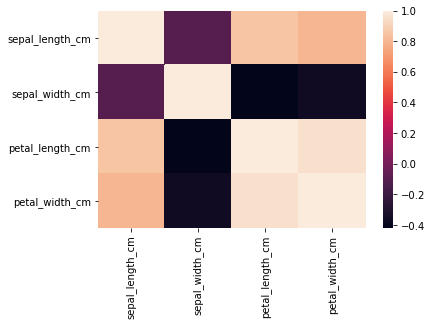

In [31]:
import seaborn as sns
sns.heatmap(iris.corr())

In [33]:
iris.to_csv('/Users/iswetha/ironhack/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-data-clean.csv',index=False)